In [31]:
import numpy as np
from numpy.linalg import norm, eigvalsh, eigvals, solve, inv

# Construir matriz y lado derecho
def generarSistema(N):
    A = np.zeros((N, N))
    for i in range(1,N-1):
        A[i, i-1] = -1
        A[i,i] = 2
        A[i,i+1] = -1
    
    A[0,0] = A[N-1, N-1] = 2
    A[0,1] = A[N-1, N-2] = -1
    
    b = np.zeros(N)
    b[:] = 1 # np.ones ...?
    return A, b

A, b = generarSistema(20)

In [32]:
def solveRichardson(A, b, omega, tol, maxit, verbose=False):
    x = b.copy()
    it = 0
    residual = b - A@x
    error = norm(residual)
    if verbose: print(f"It {it:3}, err={error:1.2e}")
    while True:
        x = x + omega * residual
        residual = b - A@x
        error = norm(residual)
        if verbose: print(f"It {it:3}, err={error:1.2e}")
        if error < tol or it > maxit or error > 1e14:
            if error < tol:
                print(f"\tConverged in {it} iterations, error={error:1.2e}")
            else:
                print("\tDiverged")
            return x, it
        else:
            it += 1

In [33]:
def solveJacobi(A, b, omega, tol, maxit, verbose=False):
    x = b.copy()
    it = 0
    D = np.diagflat(np.diagonal(A))
    residual = b - A@x
    error = norm(residual)
    if verbose: print(f"It {it:3}, err={error:1.2e}")
    while True:
        dx = solve(D, residual)
        x = x + omega * dx
        residual = b - A@x
        error = norm(residual)
        if verbose: print(f"It {it:3}, err={error:1.2e}")
        if error < tol or it > maxit or error > 1e14:
            if error < tol:
                print(f"\tConverged in {it} iterations, error={error:1.2e}")
            else:
                print("\tDiverged")
            return x, it
        else:
            it += 1

In [34]:
def solveGaussSeidel(A, b, omega, tol, maxit, verbose=False):
    x = b.copy()
    it = 0
    L = np.tril(A)
    residual = b - A@x
    error = norm(residual)
    if verbose: print(f"It {it:3}, err={error:1.2e}")
    while True:
        dx = solve(L, residual)
        x = x + omega * dx
        residual = b - A@x
        error = norm(residual)
        if verbose: print(f"It {it:3}, err={error:1.2e}")
        if error < tol or it > maxit or error > 1e14:
            if error < tol:
                print(f"\tConverged in {it} iterations, error={error:1.2e}")
            else:
                print("\tDiverged")
            return x, it
        else:
            it += 1

In [35]:
tol = 1e-6
maxit = 10000

# Richardson tests
eigs = eigvalsh(A)
omega = 1
xsol, _ = solveRichardson(A, b, omega, tol, maxit)
omega = 2/(max(eigs) + min(eigs))
xsol, _ = solveRichardson(A, b, omega, tol, maxit)

	Diverged
	Converged in 1354 iterations, error=9.89e-07


In [36]:
# Jacobi tests
omega = 1
xsol, _ = solveJacobi(A, b, omega, tol, maxit)
D = np.diagflat(np.diagonal(A))
Dinv = inv(D)
DinvA = Dinv @ A
eigs = eigvals(DinvA)
omega = 2/(max(eigs) + min(eigs))
xsol, _ = solveJacobi(A, b, omega, tol, maxit)

	Converged in 1354 iterations, error=9.89e-07
	Converged in 1354 iterations, error=9.89e-07


In [40]:
# Gauss-Seidel
omega = 1
xsol, _ = solveGaussSeidel(A, b, omega, tol, maxit)
L = np.tril(A)
Linv = inv(L)
LinvA = Linv @ A
eigs = eigvals(LinvA)
omega = 2/(max(eigs) + min(eigs))
_, _ = solveGaussSeidel(A, b, omega, tol, maxit) # Ver que omega tiene vals complejos!

	Converged in 678 iterations, error=9.80e-07
	Diverged


[1.        +0.j 0.0222136 +0.j 0.08688061+0.j 0.1882551 +0.j]


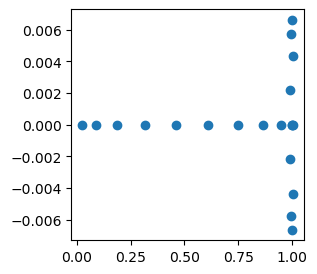

In [46]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3,3]
print(eigs[0:4])
_ = plt.scatter(eigs.real, eigs.imag)
plt.show()

In [48]:
res = A @ xsol - b
from numpy.linalg import norm
print(norm(res))
print(res[:4])

9.79615736689055e-07
[-9.79859465e-08 -1.42625680e-07 -1.83105577e-07 -2.18618837e-07]
